# EDA

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
from scipy.spatial import cKDTree

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import TargetEncoder

## Matching airlines to weather stations
This step was completed once to generate the airport_station_key.csv, and as such was commented out

In [23]:
# # Downloaded and obtained the location of each station
# df_station_latlon=pd.read_csv(r'ghcnd-stations.csv')
# weather_df = df_station_latlon[['ID', 'Latitude', 'Longitude']]

In [24]:
# # Read combined parquet file and obtain a unique list of all origins and destinations
# raw = pd.read_parquet(r'combined_data.parquet')
# df_unique_origin = raw[['FlightDate', 'Origin']].drop_duplicates().rename(columns={'FlightDate': 'Date', 'Origin': 'Location'})
# df_unique_dest = raw[['FlightDate', 'Dest']].drop_duplicates().rename(columns={'FlightDate': 'Date', 'Dest': 'Location'})

In [25]:
# # Combine the two DataFrames and drop the duplicates
# df_date_location = pd.concat([df_unique_origin, df_unique_dest]).drop_duplicates()
# airports = df_date_location[['Location']].drop_duplicates()

In [26]:
# # Get locations of airports and pull out relevant features
# airport_locations = pd.read_csv(r'airports.dat', header=None)
# airport_latlon = airport_locations[[1,2,3,4,6,7]].rename(columns={1:'Airport Name', 2:'City', 3:'Country', 4: 'Location', 6: 'Latitude', 7: 'Longitude'})

In [27]:
# # Merge the unique airport list found in the flight data set with the latitude and logitutde data found from the airport location data set
# airport_latlon_complete = pd.merge(airports, airport_latlon, on='Location', how='left').sort_values('Location').reset_index(drop=True)
# airport_df = airport_latlon_complete[['Location', 'Latitude', 'Longitude']]

In [28]:
# # Use cKDTree to merge the 2 datasets together

# # Convert lat/lon to NumPy arrays
# airport_coords = np.radians(airport_df[['Latitude', 'Longitude']].values)
# weather_coords = np.radians(weather_df[['Latitude', 'Longitude']].values)

# # Create a KD-Tree for fast nearest neighbor search
# tree = cKDTree(weather_coords)

# # Find the nearest weather station for each airport
# distances, indices = tree.query(airport_coords, k=1)  # k=1 finds the closest station

# # Extract the matched stations
# nearest_stations = weather_df.iloc[indices].reset_index(drop=True)

# # Combine results
# airport_df["closest_station_name"] = nearest_stations["ID"]
# airport_df["station_lat"] = nearest_stations["Latitude"]
# airport_df["station_lon"] = nearest_stations["Longitude"]
# airport_df["distance_km"] = distances * 6371  # Convert radians to kilometers

# # Save and display results
# airport_df[['Airport', 'Closest_Station']].to_csv(r"airport_station_key.csv", index=False)

## Weather EDA

Performing EDA afte weather data has been incorporated

In [29]:
df_final = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\final_data.parquet')

In [30]:
df_final.head()

,FlightDate,DayOfWeek,Month,Airline,Origin,Dest,Cancelled,Diverted,DivAirportLandings,CRSDepTime,...,Origin_PRCP,Origin_SNOW,Origin_SNWD,Origin_TMAX,Origin_TMIN,Dest_PRCP,Dest_SNOW,Dest_SNWD,Dest_TMAX,Dest_TMIN
0,2018-01-23,2,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,1202,...,0.0,0.0,0.0,200.0,78.0,0.0,0.0,0.0,172.0,44.0
1,2018-01-24,3,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,1202,...,0.0,0.0,0.0,156.0,22.0,0.0,0.0,0.0,117.0,17.0
2,2018-01-25,4,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,1202,...,0.0,0.0,0.0,183.0,22.0,0.0,0.0,0.0,144.0,0.0
3,2018-01-26,5,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,1202,...,0.0,0.0,0.0,200.0,-5.0,0.0,0.0,0.0,144.0,17.0
4,2018-01-27,6,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,1400,...,0.0,0.0,0.0,222.0,117.0,15.0,0.0,0.0,139.0,94.0


In [31]:
df_final.columns

Index(['FlightDate', 'DayOfWeek', 'Month', 'Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'DivAirportLandings', 'CRSDepTime', 'DepTime',
       'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDel15',
       'AirTime', 'Distance', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'DelayCategory', 'AirTimeCategory', 'TimeofDay', 'Origin_PRCP',
       'Origin_SNOW', 'Origin_SNWD', 'Origin_TMAX', 'Origin_TMIN', 'Dest_PRCP',
       'Dest_SNOW', 'Dest_SNWD', 'Dest_TMAX', 'Dest_TMIN'],
      dtype='object')

In [32]:
df_final_weather_delay = df_final[['DepDelay', 'DepDel15','Origin_PRCP',
       'Origin_SNOW', 'Origin_SNWD', 'Origin_TMAX', 'Origin_TMIN', 'Dest_PRCP',
       'Dest_SNOW', 'Dest_SNWD', 'Dest_TMAX', 'Dest_TMIN']]

In [33]:
df_final_weather_delay.head()

,DepDelay,DepDel15,Origin_PRCP,Origin_SNOW,Origin_SNWD,Origin_TMAX,Origin_TMIN,Dest_PRCP,Dest_SNOW,Dest_SNWD,Dest_TMAX,Dest_TMIN
0,-5.0,0.0,0.0,0.0,0.0,200.0,78.0,0.0,0.0,0.0,172.0,44.0
1,-5.0,0.0,0.0,0.0,0.0,156.0,22.0,0.0,0.0,0.0,117.0,17.0
2,-9.0,0.0,0.0,0.0,0.0,183.0,22.0,0.0,0.0,0.0,144.0,0.0
3,-12.0,0.0,0.0,0.0,0.0,200.0,-5.0,0.0,0.0,0.0,144.0,17.0
4,-5.0,0.0,0.0,0.0,0.0,222.0,117.0,15.0,0.0,0.0,139.0,94.0


In [34]:
df_final_weather_delay15 = df_final_weather_delay[df_final_weather_delay['DepDel15']==1]

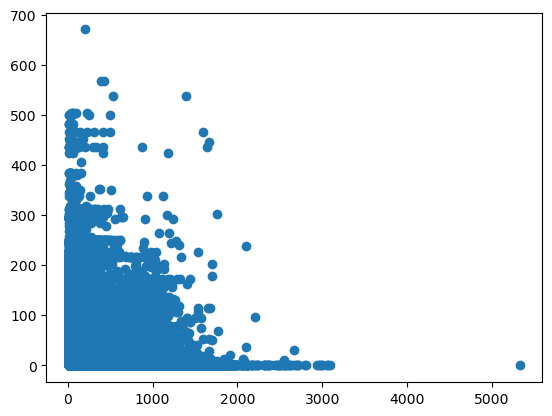

In [35]:
plt.scatter(df_final_weather_delay15['DepDelay'], df_final_weather_delay15['Origin_SNOW'])

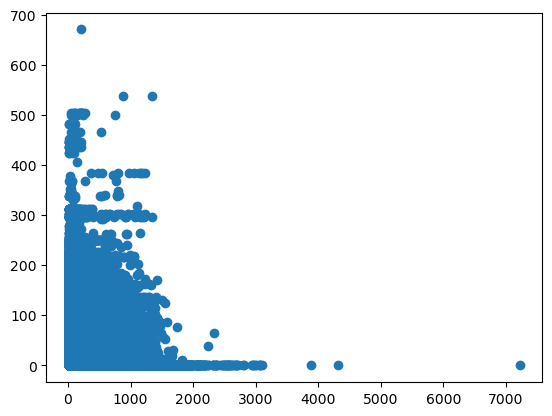

In [36]:
plt.scatter(df_final_weather_delay15['DepDelay'], df_final_weather_delay15['Dest_SNOW'])

In [37]:
target = 'DepDelay'

In [43]:
correlation_matrix = df_final_weather_delay.corr(method="spearman")  # Use 'spearman' if needed
target_correlation = correlation_matrix[target].drop(target)  # Exclude self-correlation

In [44]:
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

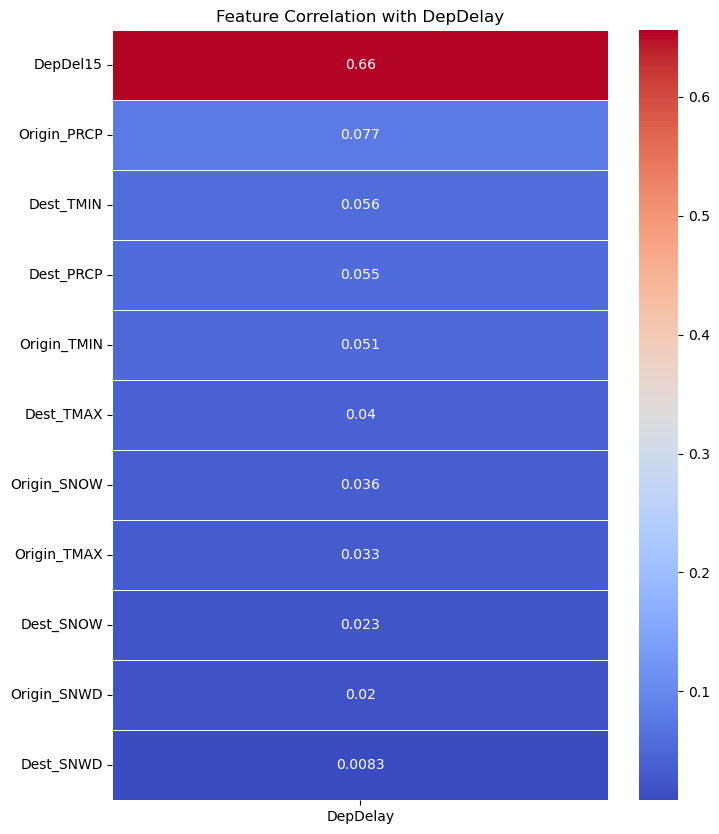

DepDel15       0.656024
Origin_PRCP    0.077253
Dest_TMIN      0.056420
Dest_PRCP      0.055419
Origin_TMIN    0.050512
Dest_TMAX      0.039805
Origin_SNOW    0.036094
Origin_TMAX    0.033315
Dest_SNOW      0.023291
Origin_SNWD    0.019743
Name: DepDelay, dtype: float64


In [45]:
plt.figure(figsize=(8, 10))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(f"Feature Correlation with {target}")
plt.show()

print(sorted_correlations.head(10))

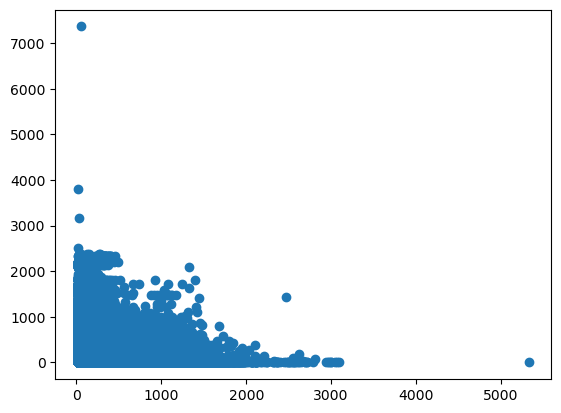

In [46]:
plt.scatter(df_final_weather_delay15['DepDelay'], df_final_weather_delay15['Origin_PRCP'])

## Feature Engineering

In [3]:
df = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\final_data.parquet')

In [ ]:
# df.head()

In [4]:
df.columns

Index(['FlightDate', 'DayOfWeek', 'Month', 'Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'DivAirportLandings', 'CRSDepTime', 'DepTime',
       'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDel15',
       'AirTime', 'Distance', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'DelayCategory', 'AirTimeCategory', 'TimeofDay', 'Origin_PRCP',
       'Origin_SNOW', 'Origin_SNWD', 'Origin_TMAX', 'Origin_TMIN', 'Dest_PRCP',
       'Dest_SNOW', 'Dest_SNWD', 'Dest_TMAX', 'Dest_TMIN'],
      dtype='object')

In [ ]:
# plt.hist(df['DepDel15'], bins=2)

In [ ]:
# len(df)

In [ ]:
# df_2018 = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\final_2018.parquet')

In [ ]:
# plt.hist(df_2018['DepDel15'], bins=2)

In [ ]:
# len(df_2018)

5647643

In [5]:
# Separate delayed and non-delayed flights
delayed_flights = df[df['DepDel15'] == 1]
on_time_flights = df[df['DepDel15'] == 0]

# Undersample non-delayed to match delayed (1:1 ratio)
on_time_flights_sampled = resample(on_time_flights,
                                   replace=False,  # No duplicates
                                   n_samples=len(delayed_flights),  # Match delayed count
                                   random_state=42)

# Combine undersampled data
df_balanced = pd.concat([delayed_flights, on_time_flights_sampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['DepDel15'].value_counts())  # Check final class distribution

DepDel15
1.0    4864653
0.0    4864653
Name: count, dtype: int64


In [6]:
X = df_balanced[['Airline', 'Origin', 'Dest']]
y = df_balanced['DepDel15']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
encoder = TargetEncoder(random_state=42)

In [9]:
X_train_encoded = encoder.fit_transform(X_train, y_train)

In [10]:
X_test_encoded = encoder.transform(X_test)

In [12]:
X_test

,Airline,Origin,Dest
1545658,Republic Airlines,BOS,PHL
8990767,Alaska Airlines Inc.,PHL,SFO
8339980,American Airlines Inc.,PHL,MCO
2622696,Allegiant Air,CVG,FLL
2009930,ExpressJet Airlines Inc.,IAH,BTR
...,...,...,...
334446,United Air Lines Inc.,IAH,PDX
358790,Delta Air Lines Inc.,DTW,MSP
7996735,JetBlue Airways,SJU,EWR
1911829,SkyWest Airlines Inc.,LAX,LAS


In [11]:
X_test_encoded

array([[0.43877318, 0.52447649, 0.50253201],
       [0.44311331, 0.47242036, 0.54513449],
       [0.51125991, 0.47242036, 0.55148169],
       ...,
       [0.62216308, 0.55670152, 0.61321863],
       [0.4565399 , 0.48976483, 0.52774835],
       [0.5020811 , 0.52617947, 0.55148169]])

In [23]:
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

# Evaluate the model
accuracy = model.score(X_test_encoded, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.57


In [23]:
df['Airline'].nunique()

28

In [24]:
df['Origin'].nunique()

388

In [25]:
df['Dest'].nunique()

388

In [26]:
X = df.drop(columns=['DepDelay'])
y = df['DepDelay']

# For demonstration, do a typical train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
cat_cols = ['Airline', 'Origin', 'Dest']

te = TargetEncoder(
    cols=cat_cols,
    smoothing=5.0,   # example smoothing; tune as needed
    cv=5,            # use 5-fold out-of-fold encoding on the training set
    random_state=42
)

TypeError: TargetEncoder.__init__() got an unexpected keyword argument 'cv'

In [ ]:
X_train_encoded = te.fit_transform(X_train, y_train)

In [ ]:
X_test_encoded = te.transform(X_test)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

# Evaluate on the test set
score = model.score(X_test_encoded, y_test)
print("R^2 on test:", score)

In [ ]:
df_2018 = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_flight\processed_flight_2018.parquet')

In [14]:
print(len(df_2018))

5689512


In [15]:
df_2018 = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_flight\processed_flight_2018.parquet')

In [16]:
print(len(df_2018))

2104100


## Testing

In [3]:
X_test = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\X_test_enc.parquet')

In [9]:
X_test.columns

Index(['FlightDate', 'DayOfWeek', 'Month', 'Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'DivAirportLandings', 'CRSDepTime', 'DepTime',
       'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDel15', 'AirTime',
       'Distance', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'DelayCategory', 'AirTimeCategory', 'TimeofDay', 'Origin_PRCP',
       'Origin_SNOW', 'Origin_SNWD', 'Origin_TMAX', 'Origin_TMIN', 'Dest_PRCP',
       'Dest_SNOW', 'Dest_SNWD', 'Dest_TMAX', 'Dest_TMIN',
       'weekly_avg_origin_tmin', 'weekly_avg_dest_tmin',
       'monthly_avg_origin_tmin', 'monthly_avg_dest_tmin',
       'weekly_avg_origin_tmax', 'weekly_avg_dest_tmax',
       'monthly_avg_origin_tmax', 'monthly_avg_dest_tmax',
       'weekly_avg_origin_prcp', 'weekly_avg_dest_prcp',
       'monthly_avg_origin_prcp', 'monthly_avg_dest_prcp',
       'weekly_avg_origin_snow', 'weekly_avg_dest_snow',
       'monthly_avg_origin_snow', 'monthly_avg_dest_snow',
       'weekly_avg_origin_snwd'

In [7]:
y_test = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\y_test.parquet')

In [10]:
X_test

,FlightDate,DayOfWeek,Month,Airline,Origin,Dest,Cancelled,Diverted,DivAirportLandings,CRSDepTime,...,monthly_avg_origin_prcp,monthly_avg_dest_prcp,weekly_avg_origin_snow,weekly_avg_dest_snow,monthly_avg_origin_snow,monthly_avg_dest_snow,weekly_avg_origin_snwd,weekly_avg_dest_snwd,monthly_avg_origin_snwd,monthly_avg_dest_snwd
0,2019-04-01,1,4,0.571597,0.582079,0.525650,False,False,0.0,1725,...,0.000000,35.866667,0.0,13.857143,0.0,4.433333,0.0,11.428571,0.0,2.666667
1,2019-02-27,3,2,0.514876,0.499453,0.535105,False,False,0.0,2135,...,8.000000,11.266667,0.0,0.000000,0.0,9.666667,0.0,0.000000,0.0,52.666667
2,2022-03-10,4,3,0.514876,0.499453,0.418999,False,False,0.0,1155,...,0.000000,72.266667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,2020-02-29,6,2,0.458835,0.551122,0.438599,False,False,0.0,1230,...,0.000000,12.633333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,2019-07-25,4,7,0.596515,0.480537,0.522816,False,False,0.0,659,...,0.000000,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526291,2021-07-19,1,7,0.395342,0.527848,0.505152,False,False,0.0,1320,...,0.000000,85.300000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1526292,2019-11-27,3,11,0.515391,0.551122,0.495104,False,False,0.0,850,...,0.000000,93.966667,0.0,92.571429,0.0,98.600000,0.0,191.428571,0.0,106.333333
1526293,2019-08-27,2,8,0.618841,0.480981,0.552578,False,False,0.0,1250,...,0.000000,9.366667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1526294,2021-11-12,5,11,0.596515,0.465375,0.525740,False,False,0.0,1756,...,0.000000,56.033333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [5]:
df_test = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_flight\processed_flight_2019.parquet')

In [6]:
df_test.columns

Index(['FlightDate', 'DayOfWeek', 'Month', 'Airline', 'Origin', 'Dest',
       'CRSDepTime', 'CRSArrTime', 'AirTime', 'Distance', 'DepDelay',
       'DepDel15', 'DepTime', 'ArrTime', 'ArrDelay', 'ArrDel15', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'Cancelled', 'Diverted',
       'DivAirportLandings', 'DelayCategory', 'AirTimeCategory', 'TimeofDay',
       'DayOfYear', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
       'DayOfYear_sin', 'DayOfYear_cos', 'Holiday_Indicator', 'Near_Holiday'],
      dtype='object')

In [9]:
df_test_noaa = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_noaa\processed_noaa_2019.parquet')

In [11]:
df_test_noaa

,STATION,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,ABE,2019-01-01,3.0,0.0,0.0,139.0,39.0
1,ABE,2019-01-02,0.0,0.0,0.0,56.0,17.0
2,ABE,2019-01-03,3.0,0.0,0.0,67.0,-16.0
3,ABE,2019-01-04,10.0,0.0,0.0,67.0,-32.0
4,ABE,2019-01-05,188.0,0.0,0.0,83.0,17.0
...,...,...,...,...,...,...,...
115624,YNG,2019-12-27,0.0,0.0,0.0,161.0,44.0
115625,YNG,2019-12-28,0.0,0.0,0.0,78.0,6.0
115626,YNG,2019-12-29,150.0,0.0,0.0,133.0,28.0
115627,YNG,2019-12-30,86.0,0.0,0.0,156.0,28.0


In [19]:
X = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\final\train_data.parquet')

In [20]:
X

,DayOfWeek,Month,Airline,Origin,Dest,CRSDepTime,CRSArrTime,AirTime,Distance,DepDelayMinutes,...,weekly_avg_dest_snow,weekly_avg_dest_snwd,monthly_avg_dest_tmin,monthly_avg_dest_tmax,monthly_avg_dest_prcp,monthly_avg_dest_snow,monthly_avg_dest_snwd,weekly_avg_origin_depdelayminutes,monthly_avg_origin_depdelayminutes,DepDel15
0,1.491857,0.274015,0.515490,0.549436,0.548700,1.038799,1.070781,-0.114957,-0.149497,23.0,...,-0.20757,-0.144102,0.899343,0.922863,-0.339691,-0.30615,-0.170214,-0.575107,-0.495929,1.0
1,-0.003956,-0.925862,0.446891,0.523223,0.455233,0.059478,0.345370,-0.462253,-0.297124,0.0,...,-0.20757,-0.144102,-0.819315,-0.761296,1.423575,-0.30615,-0.170214,-0.740811,-0.105870,0.0
2,-1.001165,-0.625893,0.428867,0.552727,0.450647,-1.470062,-1.188540,0.290220,0.073660,33.0,...,-0.20757,-0.144102,-0.670394,-0.809415,-0.438903,-0.30615,-0.170214,-1.281023,-1.137496,1.0
3,-1.499770,-0.325924,0.463904,0.581999,0.419396,1.121851,0.895021,-1.301549,-1.220650,125.0,...,-0.20757,-0.144102,-1.606942,-1.086722,-0.333678,-0.30615,-0.170214,-0.124998,-0.224126,1.0
4,-1.001165,-0.625893,0.574915,0.592224,0.496552,0.519724,0.585043,1.462342,1.144814,31.0,...,-0.20757,-0.144102,-1.425662,-0.628702,-1.073258,-0.30615,-0.170214,0.091637,0.464294,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523428,-0.502561,0.274015,0.574944,0.550282,0.563518,0.796564,1.032433,0.507280,0.626403,3.0,...,-0.20757,-0.144102,1.383245,1.347378,0.778698,-0.30615,-0.170214,1.688027,1.448942,0.0
4523429,-1.499770,0.573984,0.574983,0.613390,0.496160,-1.798809,-1.843648,0.362574,0.336299,22.0,...,-0.20757,-0.144102,1.839936,1.786863,-0.255511,-0.30615,-0.170214,1.061213,0.954920,1.0
4523430,1.491857,-1.525800,0.428670,0.450960,0.424584,0.654684,0.891825,-0.476723,-0.226743,0.0,...,-0.20757,-0.144102,-0.465214,-0.371712,0.777194,-0.30615,-0.170214,-0.401058,0.076485,0.0
4523431,-1.499770,0.873953,0.463904,0.457287,0.434740,-0.179296,-0.172325,-0.664841,-0.666191,52.0,...,-0.20757,-0.144102,0.881326,1.256130,-1.034174,-0.30615,-0.170214,-0.862576,-0.218001,1.0


In [14]:
X['CRSArrTime'].max()

1439.0

In [9]:
X['Airline'].sum()

NameError: name 'X' is not defined

In [10]:
X.columns

Index(['DayOfWeek', 'Month', 'Airline', 'Origin', 'Dest', 'CRSDepTime',
       'CRSArrTime', 'AirTime', 'Distance', 'DepDelayMinutes',
       'AirTimeCategory', 'DistanceCategory', 'TimeofDay', 'DayOfYear',
       'CRSDepTime_sin', 'CRSDepTime_cos', 'CRSArrTime_sin', 'CRSArrTime_cos',
       'DayOfYear_sin', 'DayOfYear_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
       'Month_sin', 'Month_cos', 'Holiday_Indicator', 'Near_Holiday',
       'Weekend_Indicator', 'Working_Day', 'Origin_PRCP', 'Origin_SNOW',
       'Origin_SNWD', 'Origin_TMAX', 'Origin_TMIN', 'Dest_PRCP', 'Dest_SNOW',
       'Dest_SNWD', 'Dest_TMAX', 'Dest_TMIN', 'Origin_TMIN_1', 'Origin_TMAX_1',
       'Origin_PRCP_1', 'Origin_SNOW_1', 'Origin_SNWD_1',
       'weekly_avg_origin_tmin', 'weekly_avg_origin_tmax',
       'weekly_avg_origin_prcp', 'weekly_avg_origin_snow',
       'weekly_avg_origin_snwd', 'monthly_avg_origin_tmin',
       'monthly_avg_origin_tmax', 'monthly_avg_origin_prcp',
       'monthly_avg_origin_snow', 'monthl

In [ ]:
X.dtypes

DayOfWeek                               int64
Month                                   int64
Airline                               float64
Origin                                float64
Dest                                  float64
                                       ...   
monthly_avg_dest_snow                 float64
monthly_avg_dest_snwd                 float64
weekly_avg_origin_depdelayminutes     float64
monthly_avg_origin_depdelayminutes    float64
DepDel15                              float64
Length: 61, dtype: object


In [4]:
noaa = pd.read_csv(r'C:\Users\ekait\Git\DSC288R_Capstone\data\extracted\extracted_noaa\extracted_noaa_2019.csv')
noaa.head()

,ASN00007124,20190101,PRCP,0,Unnamed: 4,Unnamed: 5,a,Unnamed: 7
0,ASN00007129,20190101,PRCP,0,NaN,NaN,a,NaN
1,ASN00007132,20190101,PRCP,0,NaN,NaN,a,NaN
2,ASN00007134,20190101,PRCP,0,NaN,NaN,a,NaN
3,ASN00007135,20190101,PRCP,0,NaN,NaN,a,NaN
4,ASN00007139,20190101,TMAX,427,NaN,NaN,a,NaN


In [5]:
noaa.dtypes

ASN00007124     object
20190101         int64
PRCP            object
0                int64
Unnamed: 4      object
Unnamed: 5      object
a               object
Unnamed: 7     float64
dtype: object

In [11]:
noaa_pro = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_noaa\processed_noaa_2019.parquet')

In [12]:
noaa_pro.dtypes

STATION            object
DATE       datetime64[ns]
PRCP              float64
SNOW              float64
SNWD              float64
TMAX              float64
TMIN              float64
dtype: object

In [4]:
flight_pro = pd.read_parquet(r'C:\Users\ekait\Git\DSC288R_Capstone\data\processed\processed_flight\processed_flight_2019.parquet')

In [5]:
flight_pro

,FlightDate,DayOfWeek,Month,Airline,Origin,Dest,CRSDepTime,CRSArrTime,AirTime,Distance,...,DayOfYear_sin,DayOfYear_cos,DayOfWeek_sin,DayOfWeek_cos,Month_sin,Month_cos,Holiday_Indicator,Near_Holiday,Weekend_Indicator,Working_Day
0,2019-04-04,4,4,Envoy Air,LIT,ORD,732,845.0,83.0,552.0,...,0.998880,-0.047321,-4.338837e-01,-0.900969,8.660254e-01,-0.500000,0,0,0,1
1,2019-04-06,6,4,Envoy Air,LIT,ORD,732,845.0,90.0,552.0,...,0.996659,-0.081676,-7.818315e-01,0.623490,8.660254e-01,-0.500000,0,0,0,1
2,2019-04-14,7,4,Envoy Air,LIT,ORD,732,845.0,85.0,552.0,...,0.976011,-0.217723,-2.449294e-16,1.000000,8.660254e-01,-0.500000,0,0,1,0
3,2019-04-18,4,4,Envoy Air,LIT,ORD,732,845.0,82.0,552.0,...,0.958718,-0.284359,-4.338837e-01,-0.900969,8.660254e-01,-0.500000,0,0,0,1
4,2019-04-22,1,4,Envoy Air,LIT,ORD,732,845.0,79.0,552.0,...,0.936881,-0.349647,7.818315e-01,0.623490,8.660254e-01,-0.500000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975329,2019-08-03,6,8,SkyWest Airlines Inc.,CLT,LGA,675,800.0,76.0,544.0,...,-0.530730,-0.847541,-7.818315e-01,0.623490,-8.660254e-01,-0.500000,0,0,0,1
2975330,2019-11-23,6,11,Southwest Airlines Co.,SAN,DAL,975,1265.0,136.0,1182.0,...,-0.608477,0.793572,-7.818315e-01,0.623490,-5.000000e-01,0.866025,0,0,0,1
2975331,2019-08-07,3,8,Delta Air Lines Inc.,MLB,ATL,1040,1147.0,68.0,442.0,...,-0.587785,-0.809017,4.338837e-01,-0.900969,-8.660254e-01,-0.500000,0,0,0,1
2975332,2019-12-10,2,12,Southwest Airlines Co.,DEN,SMF,1175,1275.0,138.0,909.0,...,-0.353676,0.935368,9.749279e-01,-0.222521,-2.449294e-16,1.000000,0,0,0,1


In [15]:
X2.dtypes

DayOfWeek                               int64
Month                                   int64
Airline                               float64
Origin                                float64
Dest                                  float64
CRSDepTime                              int64
CRSArrTime                              int64
AirTime                               float64
Distance                              float64
DepDelayMinutes                       float64
AirTimeCategory                       float64
TimeofDay                             float64
DayOfYear                               int32
Month_sin                             float64
Month_cos                             float64
DayOfWeek_sin                         float64
DayOfWeek_cos                         float64
DayOfYear_sin                         float64
DayOfYear_cos                         float64
CRSDepTime_sin                        float64
CRSDepTime_cos                        float64
Holiday_Indicator                 